**Tasks**

**Logistic regression baseline**

Another strong baseline to evaluate is logistic regression

- Evaluate the logistic regression baseline
- Tune its regularization strength parameter with cross-validated grid-search
- Pick ten images and compute the probability for each class using the predict_proba() function of your estimator. Plot the results for each image and comment your findings. For example, you can plot the ten images in subplots and collect the probabilities in a DataFrame.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report
import itertools 
from sklearn.metrics import accuracy_score, roc_curve, auc


%matplotlib inline

In [3]:
# get the class label limit
class_limit = 6

# class names
class_names = ["car", "bike", "other", "van", "motorcycle", "truck"]

In [4]:
# Load the numpy .npy file
train_dataset_array = np.load("train_dataset_array.npy")
train_dataset_array_labels = np.load("train_dataset_array_labels.npy")
train_dataset_array_features = np.load("train_features.npy")

print('Train data loaded')

Train data loaded


In [5]:
# Load the numpy .npy file
test_dataset_array = np.load("test_dataset_array.npy")
test_dataset_array_labels = np.load("test_dataset_array_labels.npy")
test_dataset_array_features = np.load("test_features.npy")

print('Test data loaded')

Test data loaded


In [6]:
# Load the numpy .npy file
valid_dataset_array = np.load("valid_dataset_array.npy")
valid_dataset_array_labels = np.load("valid_dataset_array_labels.npy")
valid_dataset_array_features = np.load("valid_features.npy")

print('Validation data loaded')

Validation data loaded


In [7]:
# Create X/y arrays
X_tr = train_dataset_array_features
y_tr = train_dataset_array_labels

print('X:', X_tr.shape, X_tr.dtype)
print('y:', y_tr.shape, y_tr.dtype)

X: (280, 1024) float32
y: (280,) int64


In [8]:
# Create X/y arrays
X_val = valid_dataset_array_features
y_val = valid_dataset_array_labels

print('X_val:', X_val.shape, X_val.dtype)
print('y_val:', y_val.shape, y_val.dtype)

X_val: (139, 1024) float32
y_val: (139,) int64


In [9]:
# Create X/y arrays
X_te = test_dataset_array_features
y_te = test_dataset_array_labels

print('X_te:', X_te.shape, X_te.dtype)
print('y_te:', y_te.shape, y_te.dtype)

X_te: (50, 1024) float32
y_te: (50,) int64


In [10]:
# We take ten random pictures from the test set and compute their class-probabilities
random_10 = random.sample(range(0, len(X_te)), 10)

Now we create and define our classification model. C is a positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization. We will try with a very strong and a very "weak" regularization strength.

In [11]:
# Create the estimator
logreg = make_pipeline(
    StandardScaler(), LogisticRegression(multi_class='ovr', solver='liblinear'))

# Fit it to train data
logreg.fit(X_tr, y_tr)

y_pred = logreg.predict(X_val)

In [12]:
# Accuracy on validation set
accuracy = logreg.score(X_val, y_val)
print('Baseline accuracy on the validation set: {:.3f}'.format(accuracy))

# Accuracy on test set
accuracy = logreg.score(X_te, y_te)
print('Baseline accuracy on the test set: {:.3f}'.format(accuracy))

Baseline accuracy on the validation set: 0.871
Baseline accuracy on the test set: 0.960


In [13]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

array([[30,  0,  0,  1,  1,  0],
       [ 0, 33,  0,  0,  0,  0],
       [ 1,  0,  8,  0,  2,  5],
       [ 2,  0,  0,  9,  1,  0],
       [ 0,  0,  0,  0, 25,  0],
       [ 0,  0,  3,  2,  0, 16]])

Text(0.5, 257.44, 'Predicted label')

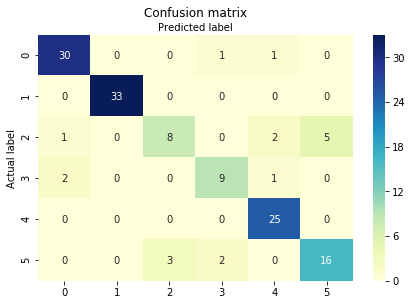

In [14]:
class_labels=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       1.00      1.00      1.00        33
           2       0.73      0.50      0.59        16
           3       0.75      0.75      0.75        12
           4       0.86      1.00      0.93        25
           5       0.76      0.76      0.76        21

   micro avg       0.87      0.87      0.87       139
   macro avg       0.84      0.82      0.83       139
weighted avg       0.87      0.87      0.86       139



In [16]:
probability_best = logreg.predict_proba(X_te[random_10])

In [17]:
df = pd.DataFrame.from_records(data=probability_best, columns=class_names)
df

,car,bike,other,van,motorcycle,truck
0,0.546616,0.000392,0.175318,0.274915,0.002558,0.000200
1,0.507572,0.000370,0.005337,0.478127,0.000311,0.008284
2,0.000093,0.000009,0.016319,0.001139,0.877291,0.105149
3,0.895301,0.000201,0.001587,0.081057,0.019483,0.002370
4,0.003605,0.000254,0.011738,0.061163,0.923106,0.000134
5,0.012945,0.904537,0.055120,0.002585,0.000291,0.024522
6,0.017079,0.947242,0.005352,0.008059,0.010201,0.012067
7,0.613837,0.000110,0.017368,0.342384,0.023469,0.002831
8,0.034696,0.013566,0.896248,0.000453,0.005795,0.049242
9,0.000025,0.023164,0.286081,0.103107,0.001149,0.586474


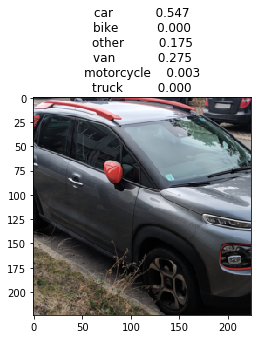

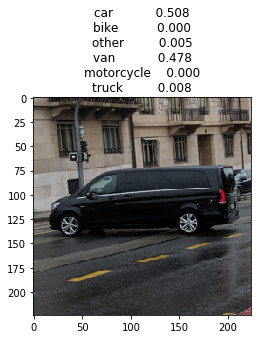

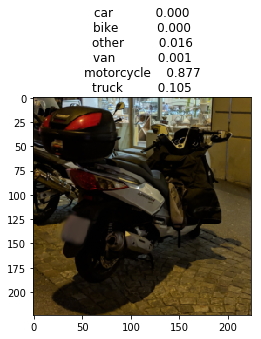

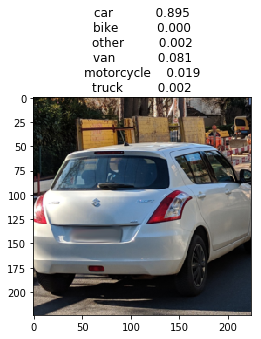

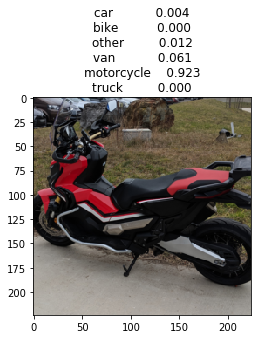

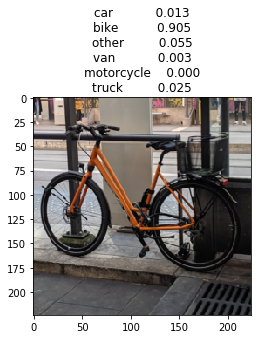

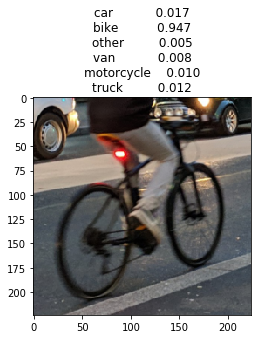

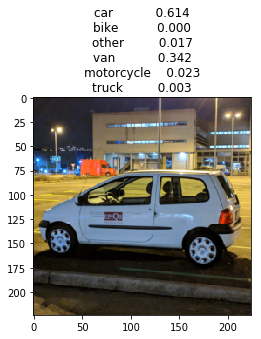

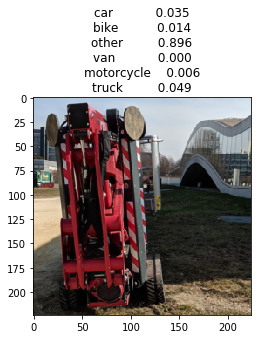

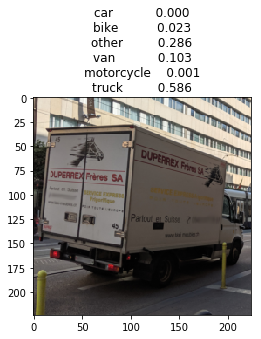

In [18]:
# Plotting the pictures and their class-probabilities
ten_pix  = test_dataset_array[random_10]
for i in range(len(ten_pix)):
    flat_img = ten_pix [i,:]
    plt.imshow(flat_img)
    plt.title(df.iloc[i].map('{:,.3f}'.format).to_string())
    plt.show()
    
plt.show()

We can improve your model by setting different parameters. For example, let’s work with
the regularization strength C equal to 1000.0, instead of the default value of 1.0.

In [19]:
# Create the estimator
logreg = make_pipeline(
    # C: inverse of regularization strength
    StandardScaler(), LogisticRegression(C=1000, multi_class='ovr', solver='liblinear'))

# Fit it to train data
logreg.fit(X_tr, y_tr)

y_pred = logreg.predict(X_val)

In [20]:
# Accuracy on validation set
accuracy = logreg.score(X_val, y_val)
print('Accuracy on the validation set: {:.3f}'.format(accuracy))
# Accuracy on test set
accuracy = logreg.score(X_te, y_te)
print('Accuracy on the test set: {:.3f}'.format(accuracy))

Accuracy on the validation set: 0.878
Accuracy on the test set: 0.960


In [21]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

array([[29,  0,  0,  1,  1,  1],
       [ 0, 33,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  2,  4],
       [ 2,  0,  0,  9,  1,  0],
       [ 0,  0,  0,  0, 25,  0],
       [ 0,  0,  3,  2,  0, 16]])

Text(0.5, 257.44, 'Predicted label')

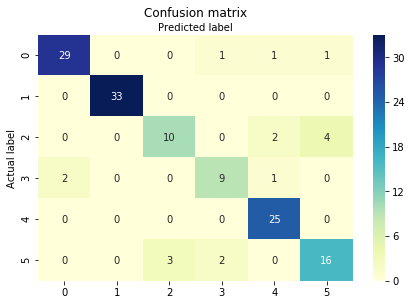

In [22]:
class_labels=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       1.00      1.00      1.00        33
           2       0.77      0.62      0.69        16
           3       0.75      0.75      0.75        12
           4       0.86      1.00      0.93        25
           5       0.76      0.76      0.76        21

   micro avg       0.88      0.88      0.88       139
   macro avg       0.85      0.84      0.84       139
weighted avg       0.88      0.88      0.88       139



We notice that regularization improves the performance on the validation data set. Let's test this on the ten random images to see how the classification results improve.

In [24]:
probability_best = logreg.predict_proba(X_te[random_10])

In [25]:
df = pd.DataFrame.from_records(data=probability_best, columns=class_names)
df

,car,bike,other,van,motorcycle,truck
0,8.282406e-01,3.003630e-06,0.115660,5.609343e-02,2.593743e-06,4.926826e-08
1,5.052791e-01,4.179111e-05,0.000016,4.946408e-01,1.392247e-08,2.258778e-05
2,1.759745e-07,5.203610e-09,0.000063,2.243804e-07,9.928957e-01,7.040960e-03
3,9.987546e-01,1.001601e-06,0.000001,9.654335e-04,2.750050e-04,2.681550e-06
4,9.460095e-05,6.539022e-07,0.000014,1.554456e-03,9.983361e-01,5.049788e-09
5,8.567062e-05,9.979303e-01,0.001741,3.479775e-06,1.123957e-07,2.396759e-04
6,2.585625e-04,9.996438e-01,0.000010,8.099285e-06,4.154064e-05,3.800348e-05
7,7.833870e-01,2.062225e-07,0.000119,2.163534e-01,1.393553e-04,1.288788e-06
8,5.211362e-02,2.504337e-04,0.946514,4.057704e-08,7.001926e-05,1.051417e-03
9,1.863930e-08,1.312625e-03,0.087981,9.020408e-03,4.485307e-05,9.016410e-01


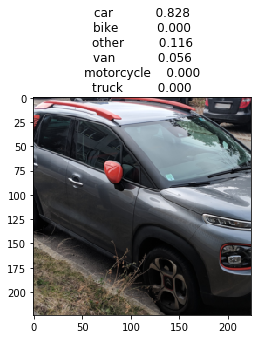

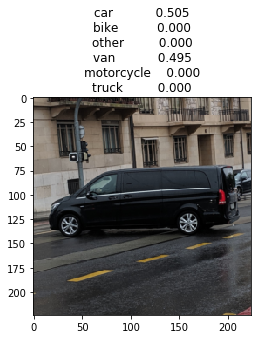

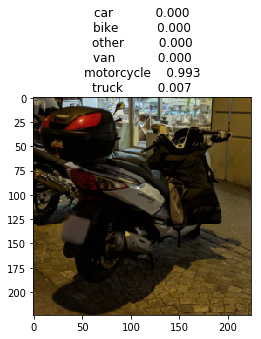

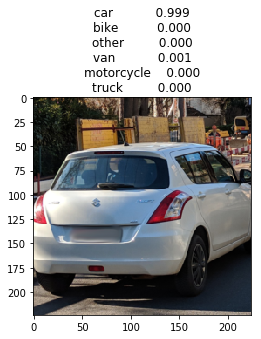

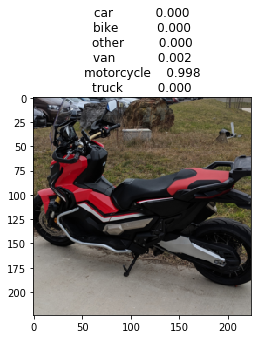

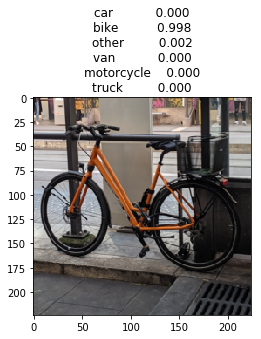

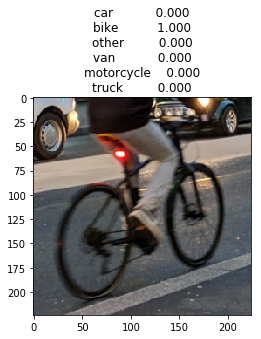

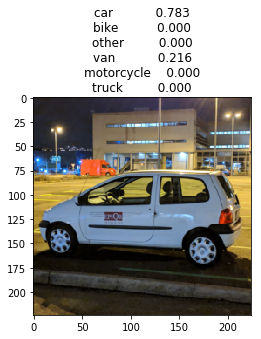

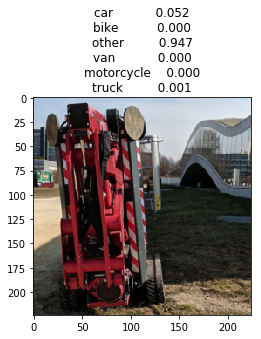

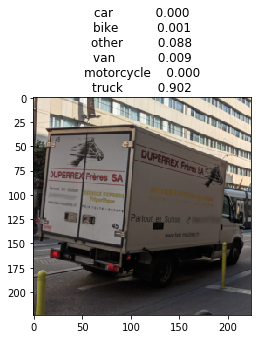

In [26]:
# Plotting the pictures and their class-probabilities
ten_pix  = test_dataset_array[random_10]
for i in range(len(ten_pix)):
    flat_img = ten_pix [i,:]
    plt.imshow(flat_img)
    plt.title(df.iloc[i].map('{:,.3f}'.format).to_string())
    plt.show()
    
plt.show()

The accuracy on the unseen data is improved a lot by a stronger regularization. For example on the first image we notice an increase from 0.547 to 0.828. 

**Testing different parameters to understand how accuracies change.**

Understanding how decision regions change when using different regularization values: we use paramter C as our regularization parameter. Parameter C = 1/λ.

Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.

Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data.

Let's build another logreg model, but this time its hyperparameter will be tuned using grid search.

In [27]:
# Create k-fold object
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

# Apply cross-validation
scores = cross_validate(logreg, X_tr, y_tr, cv=kfold, return_train_score=True)

# The "scores" variable is a dictionary with the scores
scores.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [28]:
print('Train scores:', scores['train_score']) 
print('Test scores:', scores['test_score']) 

Train scores: [1. 1. 1.]
Test scores: [0.89361702 0.84946237 0.82795699]


In [29]:
# Apply cross-validation
scores = cross_validate(logreg, X_tr, y_tr, cv=3, return_train_score=True)

print('Train scores:', scores['train_score']) 
print('Test scores:', scores['test_score'])

Train scores: [1. 1. 1.]
Test scores: [0.88421053 0.83870968 0.83695652]


In [30]:
# Create pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='ovr', solver='liblinear'))
])

Scikit-learn provides a GridSearchCV object to perform grid search with cross-validation. The object takes the estimator, a grid of parameters and the cross-validator object

In [31]:
C_param_range = np.logspace(-4, 4, num=20)
# Create cross-validation object
grid = {
    'logreg__C': C_param_range
}
grid_cv = GridSearchCV(pipe, grid, cv=5, return_train_score=True)

We pass ten C values on a log scale between 10^(-4) and 10^4 and set the cv strategy to 5-fold cross-validation (stratified by default for classification tasks).
We can now use grid_cv as a standard Scikit-learn estimator.

In [32]:
# Fit estimator
grid_cv.fit(X_tr, y_tr)

# Get the results with "cv_results_"
grid_cv.cv_results_.keys()

/Users/laura/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logreg__C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [33]:
# Mean test scores
grid_cv.cv_results_['mean_test_score']

array([0.8       , 0.825     , 0.84285714, 0.86785714, 0.875     ,
       0.87142857, 0.86785714, 0.86428571, 0.86428571, 0.86428571,
       0.86428571, 0.86428571, 0.86428571, 0.87142857, 0.86785714,
       0.875     , 0.88214286, 0.875     , 0.86785714, 0.86071429])

In [34]:
# Collect results in a DataFrame
cv_results = pd.DataFrame(grid_cv.cv_results_)

# Print a few interesting columns
cols = ['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'param_logreg__C']
cv_results[cols].sort_values('mean_test_score', ascending=False)

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_logreg__C
16,0.882143,0.014118,1.000000,0.000000,545.559
4,0.875000,0.012789,0.993742,0.002214,0.00483293
17,0.875000,0.003957,1.000000,0.000000,1438.45
15,0.875000,0.012984,1.000000,0.000000,206.914
5,0.871429,0.010105,1.000000,0.000000,0.0127427
13,0.871429,0.016459,1.000000,0.000000,29.7635
18,0.867857,0.017450,1.000000,0.000000,3792.69
3,0.867857,0.020620,0.978578,0.003288,0.00183298
6,0.867857,0.018216,1.000000,0.000000,0.0335982
14,0.867857,0.013562,1.000000,0.000000,78.476


The top mean test scores are around 87% with a standard deviation of around 1%. Let's plot the test curve to better see the effect of C.

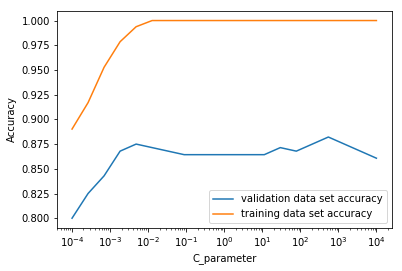

In [35]:
# Plot test curve
plt.semilogx(cv_results['param_logreg__C'], cv_results['mean_test_score'],label='validation data set accuracy') 
plt.semilogx(cv_results['param_logreg__C'], cv_results['mean_train_score'],label='training data set accuracy') 
plt.legend()
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.show()

In [36]:
print('Accuracy on the validation set: {:.3f}'.format(grid_cv.score(X_val, y_val)))

print('Accuracy on the test set: {:.3f}'.format(grid_cv.score(X_te, y_te)))

Accuracy on the validation set: 0.871
Accuracy on the test set: 0.960


In [37]:
y_pred = grid_cv.predict(X_val)
print(metrics.classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       1.00      1.00      1.00        33
           2       0.75      0.56      0.64        16
           3       0.75      0.75      0.75        12
           4       0.89      1.00      0.94        25
           5       0.70      0.76      0.73        21

   micro avg       0.87      0.87      0.87       139
   macro avg       0.84      0.83      0.83       139
weighted avg       0.87      0.87      0.87       139



In [38]:
probability_best = grid_cv.best_estimator_.predict_proba(X_te[random_10])

In [39]:
df = pd.DataFrame.from_records(data=probability_best, columns=class_names)
df

,car,bike,other,van,motorcycle,truck
0,7.355004e-01,3.920121e-06,0.135774,1.287176e-01,4.010799e-06,7.054327e-08
1,5.050058e-01,1.946166e-05,0.000029,4.948922e-01,2.973108e-08,5.355124e-05
2,1.703645e-07,1.775814e-09,0.000135,4.137481e-07,9.855798e-01,1.428457e-02
3,9.974173e-01,1.291796e-06,0.000002,2.107786e-03,4.668592e-04,4.652625e-06
4,1.200203e-04,3.510886e-07,0.000030,2.554785e-03,9.972950e-01,6.700871e-09
5,1.420044e-04,9.969696e-01,0.002386,4.579148e-06,1.318540e-07,4.977407e-04
6,3.775294e-04,9.994592e-01,0.000020,1.727805e-05,8.832661e-05,3.782717e-05
7,7.419497e-01,2.206736e-07,0.000241,2.575841e-01,2.223474e-04,2.301087e-06
8,4.695304e-02,3.160230e-04,0.951820,7.818443e-08,1.453867e-04,7.657212e-04
9,7.993410e-09,9.335998e-04,0.127675,1.287500e-02,4.914249e-05,8.584669e-01


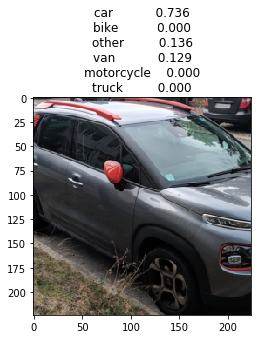

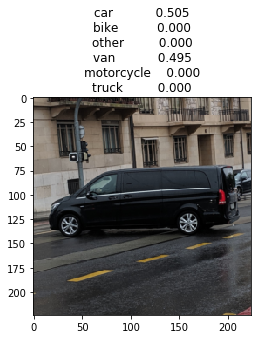

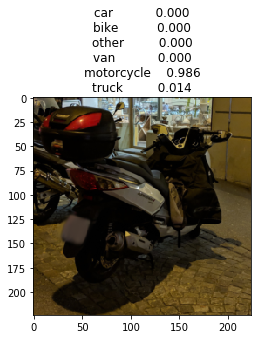

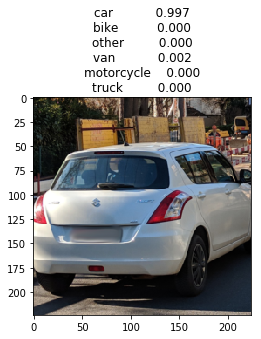

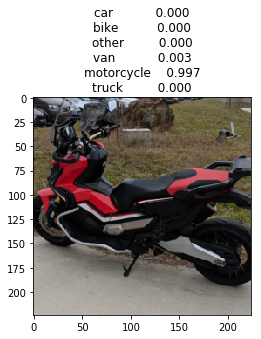

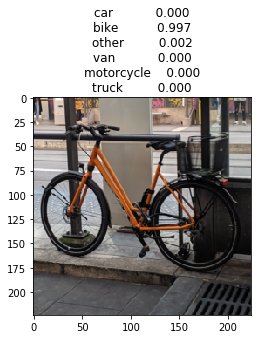

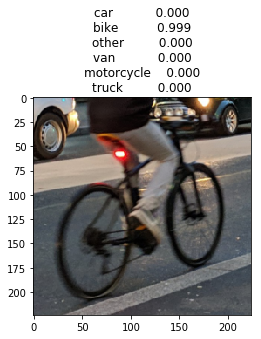

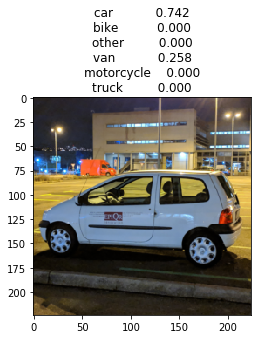

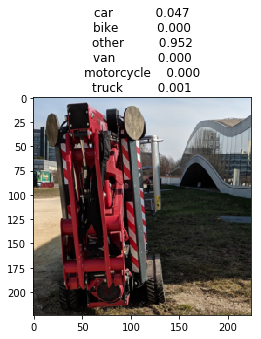

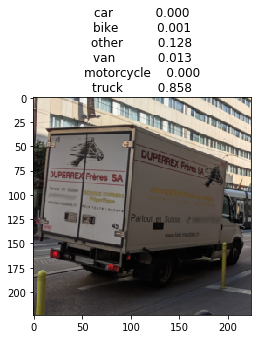

In [40]:
# Plotting the pictures and their class-probabilities
ten_pix  = test_dataset_array[random_10]
for i in range(len(ten_pix)):
    flat_img = ten_pix [i,:]
    plt.imshow(flat_img)
    plt.title(df.iloc[i].map('{:,.3f}'.format).to_string())
    plt.show()
    
plt.show()

Here we don't see a noticeable improvement by using Scikit-learn's GridSearchCV object to perform grid search with cross-validation. This is mainly due to the fact that the C parameter choice of 1000 seems already to be a good choice, as shown on the accuracy curves.